## Explorating the Tree of Life

<table><tr><td>
<img src="https://i.guim.co.uk/img/static/sys-images/Guardian/Pix/pictures/2008/04/17/DarwinSketch.article.jpg?width=445&quality=85&auto=format&fit=max&s=c7f89552d12b8495b2b4eb4d7a5bc391" width=200><a href="https://i.guim.co.uk/img/static/sys-images/Guardian/Pix/pictures/2008/04/17/DarwinSketch.article.jpg?width=445&quality=85&auto=format&fit=max&s=c7f89552d12b8495b2b4eb4d7a5bc391">source</a></td><td><img src="http://www.greennature.ca/greennature/taxonomy/tree_of_life.png" width=300><a href="http://www.greennature.ca/greennature/taxonomy/tree_of_life.png">source</a></td></tr></table>

In this hands-on exercise, you answer the following questions by using pandas data structures and methods to analyze the eukaryote genome data store in the following tab-delimited file. https://raw.githubusercontent.com/csbfx/advpy122-data/master/euk.tsv

In [31]:
import pandas as pd
%matplotlib inline

# this input file is tab-delimited instead of comma-delimited
tsvFile = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/euk.tsv"
# Load the csv file into a dataframe
euk = pd.read_csv(tsvFile, sep="\t")
euk

,Species,Kingdom,Class,Size (Mb),GC%,Number of genes,Number of proteins,Publication year,Assembly status
0,Emiliania huxleyi CCMP1516,Protists,Other Protists,167.676000,64.5,38549,38554,2013,Scaffold
1,Arabidopsis thaliana,Plants,Land Plants,119.669000,36.0529,38311,48265,2001,Chromosome
2,Glycine max,Plants,Land Plants,979.046000,35.1153,59847,71219,2010,Chromosome
3,Medicago truncatula,Plants,Land Plants,412.924000,34.047,37603,41939,2011,Chromosome
4,Solanum lycopersicum,Plants,Land Plants,828.349000,35.6991,31200,37660,2010,Chromosome
...,...,...,...,...,...,...,...,...,...
8297,Saccharomyces cerevisiae,Fungi,Ascomycetes,3.993920,38.2,-,-,2017,Scaffold
8298,Saccharomyces cerevisiae,Fungi,Ascomycetes,0.586761,38.5921,155,298,1992,Chromosome
8299,Saccharomyces cerevisiae,Fungi,Ascomycetes,12.020400,38.2971,-,-,2018,Chromosome
8300,Saccharomyces cerevisiae,Fungi,Ascomycetes,11.960900,38.2413,-,-,2018,Chromosome


## Q1. How many Mammals have at least 20,000 genes? What are their scientific names?
*Note:*
- *Mammals are under Class*
- *Scientific names are under Species*


In [32]:
# Convert the 'Genes' column to numeric, setting errors='coerce' to handle non-numeric values
euk['Number of genes'] = pd.to_numeric(euk['Number of genes'], errors='coerce')

# Filter the dataframe for mammals (Class is 'Mammalia') and genes >= 20000
mammals_with_20000_genes = euk[(euk['Class'] == 'Mammals') & (euk['Number of genes'] >= 20000)]

# Get the scientific names (species) of these mammals
scientific_names = mammals_with_20000_genes['Species']

# Print the count and scientific names
count = len(scientific_names)
print("There are ", count, " mammals with at least 20,000 genes.")
print("Their scientific names are: ", scientific_names.tolist())
mammals_with_20000_genes

There are  134  mammals with at least 20,000 genes.
Their scientific names are:  ['Homo sapiens', 'Mus musculus', 'Rattus norvegicus', 'Felis catus', 'Bos taurus', 'Ovis aries', 'Canis lupus familiaris', 'Sus scrofa', 'Ornithorhynchus anatinus', 'Equus caballus', 'Pan troglodytes', 'Macaca mulatta', 'Monodelphis domestica', 'Loxodonta africana', 'Sorex araneus', 'Erinaceus europaeus', 'Cavia porcellus', 'Echinops telfairi', 'Dasypus novemcinctus', 'Oryctolagus cuniculus', 'Pongo abelii', 'Canis lupus dingo', 'Papio anubis', 'Callithrix jacchus', 'Otolemur garnettii', 'Ictidomys tridecemlineatus', 'Nomascus leucogenys', 'Myotis lucifugus', 'Pteropus vampyrus', 'Tursiops truncatus', 'Microcebus murinus', 'Dipodomys ordii', 'Macaca fascicularis', 'Ochotona princeps', 'Bubalus bubalis', 'Galeopterus variegatus', 'Vicugna pacos', 'Gorilla gorilla gorilla', 'Ailuropoda melanoleuca', 'Cricetulus griseus', 'Sarcophilus harrisii', 'Mustela putorius furo', 'Bos indicus', 'Odocoileus virginianus 

,Species,Kingdom,Class,Size (Mb),GC%,Number of genes,Number of proteins,Publication year,Assembly status
44,Homo sapiens,Animals,Mammals,3257.32,41.465,60679.0,119294,2002,Chromosome
45,Mus musculus,Animals,Mammals,2818.97,41.951,48701.0,78443,2004,Chromosome
65,Rattus norvegicus,Animals,Mammals,2870.18,42.3282,39365.0,56113,2002,Chromosome
70,Felis catus,Animals,Mammals,2521.86,41.8806,35234.0,54726,2006,Chromosome
74,Bos taurus,Animals,Mammals,2715.85,41.9362,34966.0,63696,2017,Chromosome
...,...,...,...,...,...,...,...,...,...
4977,Rattus norvegicus,Animals,Mammals,2616.42,42.3564,36373.0,28074,2005,Chromosome
5087,Macaca mulatta,Animals,Mammals,2969.97,41.8692,21524.0,17802,2011,Chromosome
5152,Macaca fascicularis,Animals,Mammals,3126.56,42.0609,21132.0,17456,2011,Chromosome
5180,Cricetulus griseus,Animals,Mammals,2368.91,41.5,32567.0,46750,2018,Scaffold


### Q2. Animals are a part of Kingdom. How many records are there for each Class of Animals?

In [33]:
# Filter the dataframe for animals (assuming 'Kingdom' is the column with that information)
animals = euk[euk['Kingdom'] == 'Animals']

# Count the number of records for each Class within Animals
class_counts = animals['Class'].value_counts()

print("Number of records for each class of animals:")
print(class_counts)


Number of records for each class of animals:
Class
Mammals          658
Insects          602
Fishes           282
Other Animals    210
Birds            172
Roundworms       162
Flatworms         47
Reptiles          41
Amphibians         7
Name: count, dtype: int64


### Q3. Animals are a part of Kingdom. How many unique Species are there for each Class of Animals?

In [34]:
# Filter the dataframe for animals (assuming 'Kingdom' is the column with that information)
animals = euk[euk['Kingdom'] == 'Animals']

# Group by 'Class' and count the unique 'Species' for each class
unique_species_per_class = animals.groupby('Class')['Species'].nunique()

print("Number of unique species for each class of animals:")
print(unique_species_per_class)


Number of unique species for each class of animals:
Class
Amphibians         6
Birds            144
Fishes           218
Flatworms         34
Insects          402
Mammals          313
Other Animals    171
Reptiles          38
Roundworms       116
Name: Species, dtype: int64


### Q4. What are the unique scientific names of Mammals with the genus name Macaca?
*Recall: the scientific name starts with genus followed by a space and then the species name. Example: Homo sapiens, where Homo is the genus name and sapiens is the species name.*

In [35]:
# Filter the dataframe for mammals (assuming 'Class' is the column with that information)
mammals = euk[euk['Class'] == 'Mammals']

# Further filter by genus name 'Macaca' in the 'Species' column
macaca_mammals = mammals[mammals['Species'].str.startswith('Macaca')]

# Get the unique scientific names (species)
unique_macaca_species = macaca_mammals['Species'].unique()

print("Unique scientific names of mammals with genus name 'Macaca': ", len(unique_macaca_species))
print(unique_macaca_species)


Unique scientific names of mammals with genus name 'Macaca':  4
['Macaca mulatta' 'Macaca fascicularis' 'Macaca nemestrina'
 'Macaca fuscata fuscata']


### Q5. Modify the Species names to only contain the scientific names  and create a new dataframe.

Some of the names in the Species column have more than two parts, such as `Emiliania huxleyi CCMP1516`. Create a new column `Species` that contains only the first two parts of name, such as `Emiliania huxleyi`. Combine this new Species column with `Kingdom`, `Class`, `Size (Mb)`, `Number of genes`, and `Number of proteins` and store this new dataframe as `df_species`.

Hint: Follow Q3 in Lecture 4 with a little twist. Instead of just getting the first element from the split results, you will get the first two elements using `.str[0:2]` which will give you a list. You can then use `.str.join(" ")` to change it back to a string.

In [36]:
# Create a new column 'Scientific_Name' with only the first two parts of the Species names
euk['Scientific_Name'] = euk['Species'].str.split().str[:2].str.join(" ")

# Create a new DataFrame with the required columns
df_species = euk[['Kingdom', 'Class', 'Scientific_Name', 'Size (Mb)', 'Number of genes', 'Number of proteins']]

# Print the new DataFrame to verify
print("New DataFrame with modified Species names:")
print(df_species.head())


New DataFrame with modified Species names:
    Kingdom           Class       Scientific_Name  Size (Mb)  Number of genes  \
0  Protists  Other Protists     Emiliania huxleyi    167.676          38549.0   
1    Plants     Land Plants  Arabidopsis thaliana    119.669          38311.0   
2    Plants     Land Plants           Glycine max    979.046          59847.0   
3    Plants     Land Plants   Medicago truncatula    412.924          37603.0   
4    Plants     Land Plants  Solanum lycopersicum    828.349          31200.0   

  Number of proteins  
0              38554  
1              48265  
2              71219  
3              41939  
4              37660  


### Q6. Create a pie plot using pandas to show the number of unique Species in each Class of Animals using the new dataframe you created in Q5
Hint: First, create a new dataframe that contains the number of unique Species and the index is the corresponding Animals Class. Then, use that dataframe to plot the pie plot.
[Check out this documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html)

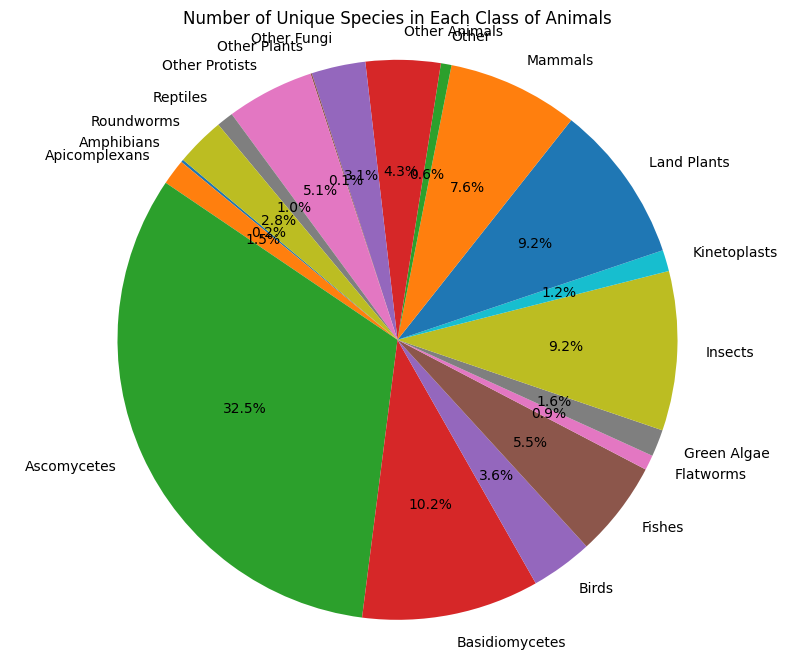

In [37]:
import matplotlib.pyplot as plt

# Count the number of unique species per class in animals
species_counts = df_species[df_species['Class'].notna()].groupby('Class')['Scientific_Name'].nunique()

# Create a DataFrame for the counts
df_counts = species_counts.reset_index(name='Unique_Species_Count')

plt.figure(figsize=(10, 8))
plt.pie(df_counts['Unique_Species_Count'], labels=df_counts['Class'], autopct='%1.1f%%', startangle=140)
plt.title('Number of Unique Species in Each Class of Animals')
plt.axis('equal')

plt.show()



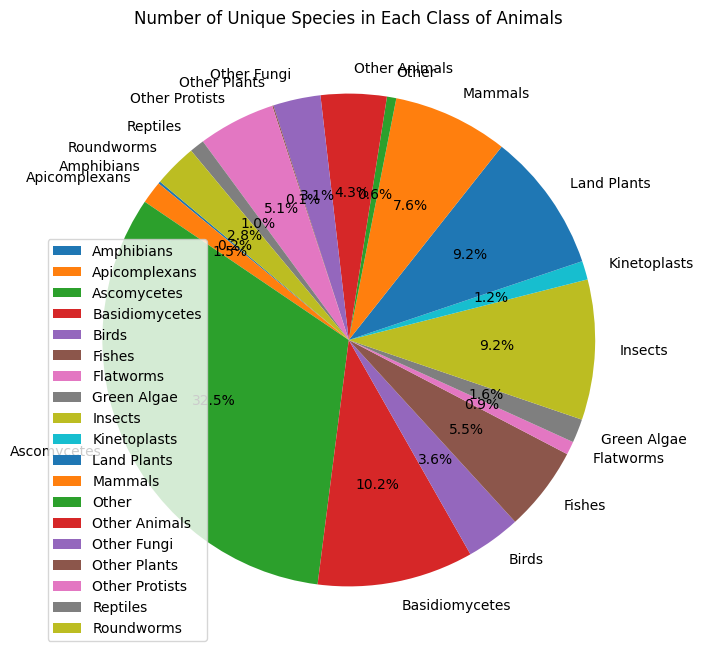

In [38]:
import pandas as pd
import matplotlib.pyplot as plt


# Count the number of unique species per class in animals
species_counts = df_species[df_species['Class'].notna()].groupby('Class')['Scientific_Name'].nunique()

# Create a DataFrame for the counts
df_counts = species_counts.reset_index(name='Unique_Species_Count')

# Set the 'Class' column as the index
df_counts.set_index('Class', inplace=True)

# Plot the pie chart using pandas
plt.figure(figsize=(10, 8))
df_counts['Unique_Species_Count'].plot.pie(autopct='%1.1f%%', startangle=140, legend=True)
plt.title('Number of Unique Species in Each Class of Animals')
plt.ylabel('')

plt.show()
